In [17]:
import pandas as pd
import statsmodels.formula.api as sf
import statsmodels.stats.anova as anova
from matplotlib import pyplot as plt
import seaborn as sb
import sys
import os

In [11]:
sys.path.append("../my_Funtions/")

In [30]:
import helper as hp

# 데이터 가져오기

In [18]:
Data=pd.read_excel("https://data.hossam.kr/E02/alrtman.xlsx")
data=pd.DataFrame(Data)

In [22]:
data["태아번호"].unique()

array([1, 2, 3], dtype=int64)

In [20]:
plt.rcParams["figure.figsize"]=(10,5)
plt.rcParams["font.family"]="BM YEONSUNG"
plt.rcParams["font.size"]=10
plt.rcParams["axes.unicode_minus"]=False

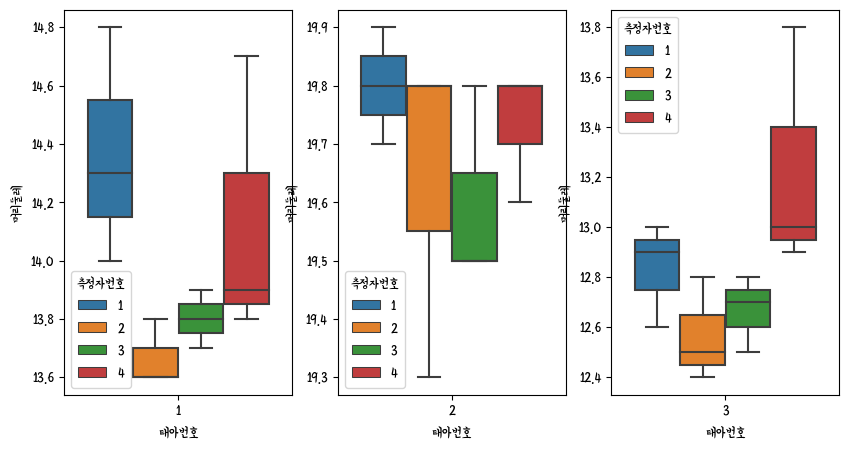

In [25]:
f,a=plt.subplots(1,3)
for i in data["태아번호"].unique():
    sb.boxplot(data=data[data["태아번호"]==i],x="태아번호",
            y="머리둘레",hue="측정자번호",ax=a[i-1])

In [33]:
hp.all_test(data[data.columns[0]],data[data.columns[1]],data[data.columns[2]])

statistic       p-value  result
condition test       field                                                 
정규성       shapiro    태아번호                    0.794544  1.271364e-05   False
                     측정자번호                   0.857769  2.887842e-04   False
                     머리둘레                    0.742801  1.429796e-06   False
          normaltest 태아번호                   23.481208  7.963801e-06   False
                     측정자번호                  14.053919  8.876264e-04   False
                     머리둘레                   24.573578  4.612277e-06   False
          ks_2samp   태아번호 vs 측정자번호           0.250000  2.122867e-01    True
                     측정자번호 vs 머리둘레           1.000000  4.519646e-21   False
                     머리둘레 vs 태아번호            1.000000  4.519646e-21   False
등분산성      Bartlett   태아번호 vs 측정자번호 vs 머리둘레  64.853335  8.265656e-15   False
          Fligner    태아번호 vs 측정자번호 vs 머리둘레  12.782139  1.676462e-03   False
          Levene     태아번호 vs 측정자번호 vs 머리둘레  13.063350  8.583289e-06   False
독립성       Chi2       태아번호 vs 측정자번호 vs 머리둘레  33.814972  9.999218e-01    True

In [36]:
lm=sf.ols("머리둘레 ~ C(태아번호)+C(측정자번호)+C(태아번호):C(측정자번호)",data=data).fit()

In [37]:
anova.anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(태아번호),2.0,324.008889,162.004444,2113.101449,1.051039e-27
C(측정자번호),3.0,1.198611,0.399537,5.211353,6.497055e-03
C(태아번호):C(측정자번호),6.0,0.562222,0.093704,1.222222,3.295509e-01
Residual,24.0,1.840000,0.076667,NaN,NaN
